In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD')

In [23]:
print(df.head())
print(df.shape)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1  
0

In [30]:
df['is_cloudy'] = (df['weather_summary'] == 'cloudy').astype(int)
df['is_clear_night'] = (df['weather_summary'] == 'clear-night').astype(int)
df['is_clear_day'] = (df['weather_summary'] == 'clear-day').astype(int)
df['is_partly_cloudy_night'] = (df['weather_summary'] == 'partly-cloudy-night').astype(int)
df['is_partly_cloudy_day'] = (df['weather_summary'] == 'partly-cloudy-day').astype(int)
df['is_fog'] = (df['weather_summary'] == 'fog').astype(int)
df['is_rain'] = (df['weather_summary'] == 'rain').astype(int)
df['is_sleet'] = (df['weather_summary'] == 'sleet').astype(int)
df['is_snow'] = (df['weather_summary'] == 'snow').astype(int)
df['is_wind'] = (df['weather_summary'] == 'wind').astype(int)

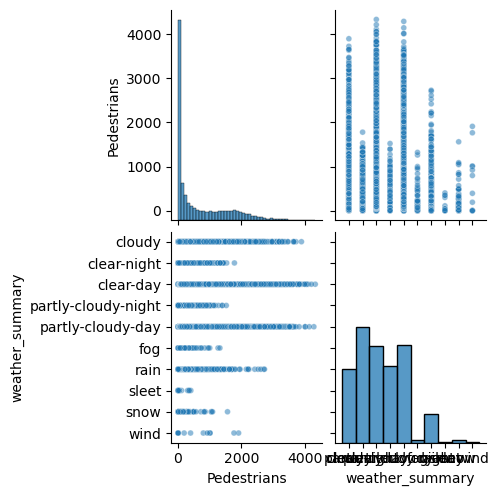

In [31]:
sns.pairplot(df,
             vars=['Pedestrians', 'weather_summary'],
             plot_kws={'alpha':0.5, 'size': 0.1})

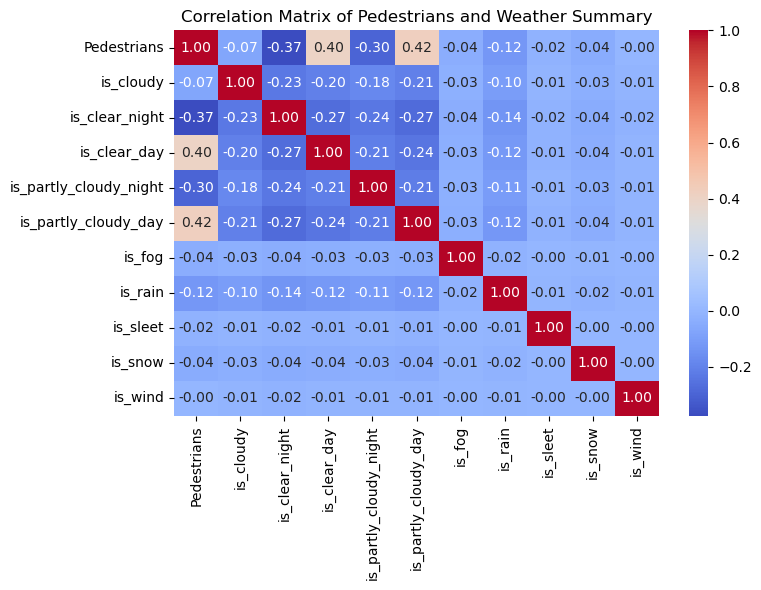

In [33]:
correlation_matrix = df[['Pedestrians', 'is_cloudy','is_clear_night', 'is_clear_day', 'is_partly_cloudy_night', 'is_partly_cloudy_day', 'is_fog', 'is_rain', 'is_sleet', 'is_snow', 'is_wind']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather Summary')
plt.tight_layout()
plt.show()